# 📊 Loan Default Risk Prediction

This notebook walks through:
- Exploratory data analysis
- Dataset checks
- Data cleaning
- Model training and evaluation

**Author**: Thomas Stone-Wigg

In [4]:
import os
print(os.getcwd())


/Users/tomstone-wigg/Desktop/GTM/Projects/codes


## 1. Load and Inspect Data

In [3]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('data/cs-training.csv', index_col=0)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 2. Run Initial Dataset Checks

In [4]:
from check_dataset import check_dataset
summary = check_dataset(df)

# Show all duplicates (not just the first occurrence)
dupes = df[df.duplicated()]

# Sort by age or another feature for visual inspection
dupes_sorted = dupes.sort_values(by=df.columns.tolist())

# Show first 10 rows of potential duplicates
print(f"Found {dupes_sorted.shape[0]} potential duplicate rows.")
dupes_sorted.head(5)

🔍 Inspection Report for Dataset
--------------------------------------------------
✅ No unnamed columns.
❌ 609 duplicate rows found.
✅ No constant columns.
✅ No columns with >95% zeros.
✅ All columns are numeric.
⚠️ Missing values detected:
MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64
❌ 1 rows with age < 18
--------------------------------------------------
Found 609 potential duplicate rows.


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
137103,0,0.0,21,0,0.0,0.0,1,0,0,0,0.0
83553,0,0.0,21,0,0.0,820.0,2,0,0,0,0.0
139346,0,0.0,21,0,0.0,820.0,2,0,0,0,0.0
127725,0,0.0,21,0,0.0,NaN,1,0,0,0,0.0
54654,0,0.0,22,0,0.0,0.0,1,0,0,0,0.0


## 3. 🧹 Clean the Data

In [5]:
from loan_data_cleaner import clean_loan_data

df_clean = clean_loan_data(df)
df_clean.head()
print("Duplicates after cleaning:", df_clean.duplicated().sum())

Duplicates after cleaning: 216


## 4. Rerun Dataset Checks

In [6]:
check_dataset(df_clean)

dupes = df_clean[df_clean.duplicated()]
# dupes_sorted = dupes.sort_values(by='age')
dupes_sorted = dupes.sort_values(by=dupes.columns.tolist())
print(f"Found {dupes_sorted.shape[0]} potential duplicate rows.")
dupes_sorted.head(5)

🔍 Inspection Report for Dataset
--------------------------------------------------
✅ No unnamed columns.
❌ 216 duplicate rows found.
✅ No constant columns.
✅ No columns with >95% zeros.
✅ All columns are numeric.
✅ No missing values.
✅ All age values >= 18.
--------------------------------------------------
Found 216 potential duplicate rows.


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
100595,0,0.0,21,0,0.0,5400.0,1,0,0,0,0.0
115786,0,0.0,23,0,0.0,5400.0,1,0,0,0,0.0
59183,0,0.0,24,0,0.0,5400.0,1,0,0,0,0.0
117303,0,0.0,24,0,520.0,5400.0,3,0,0,0,0.0
18699,0,0.0,25,0,0.0,5400.0,1,0,0,0,0.0


## EDA

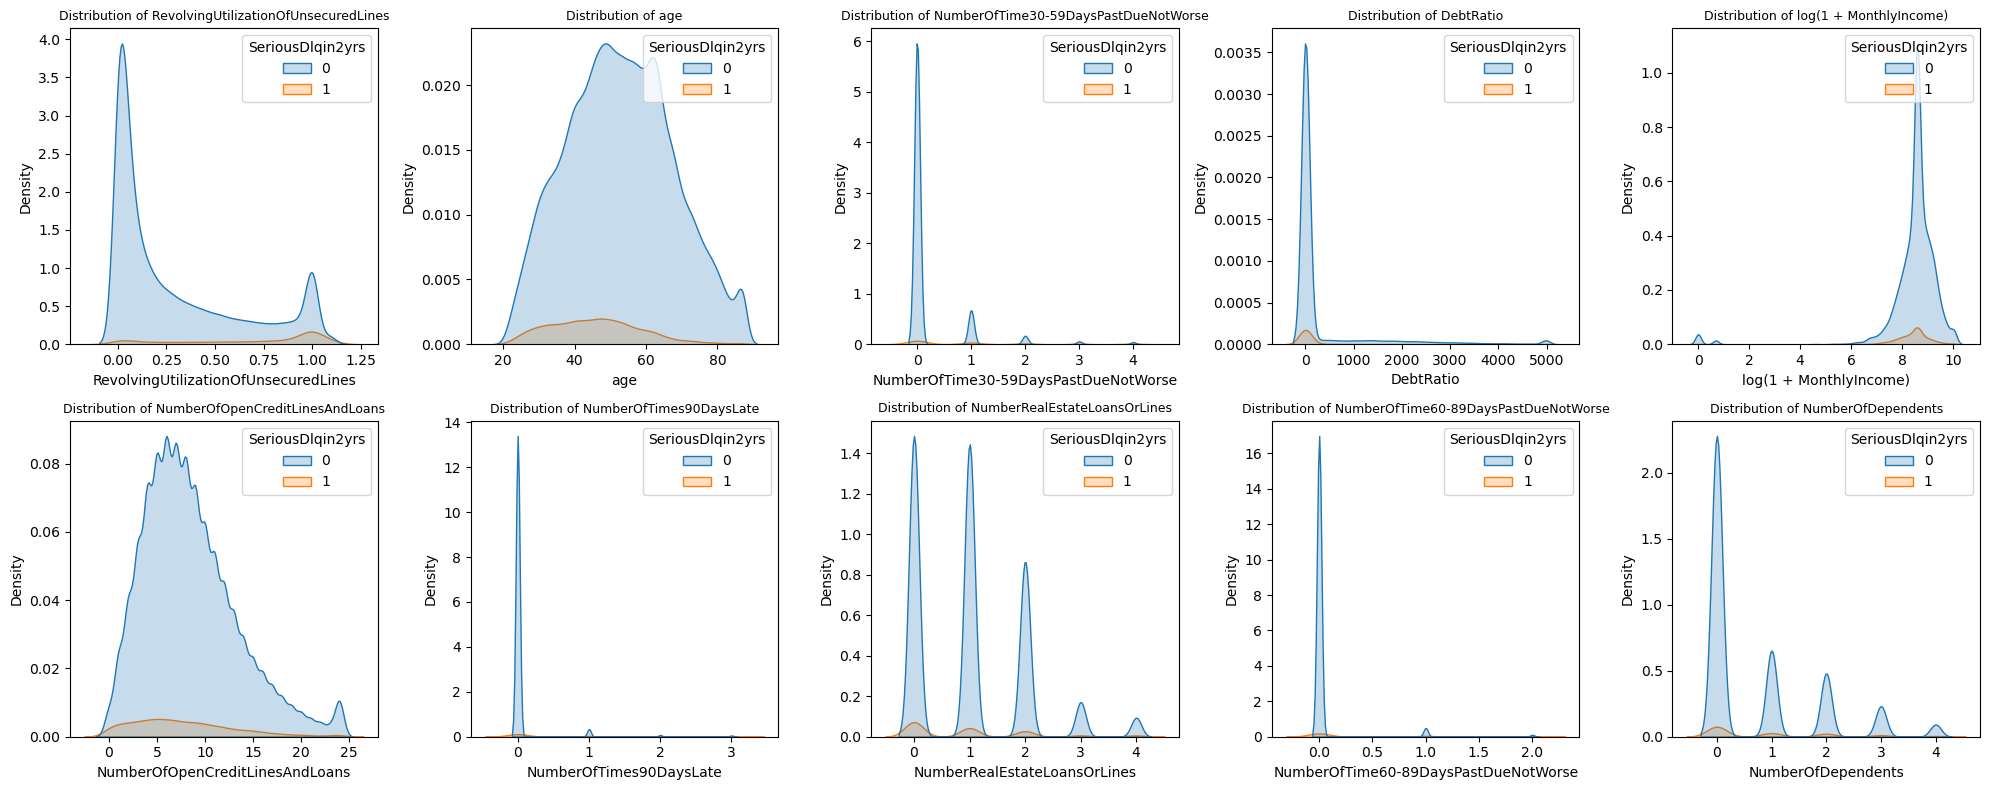

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numerical_columns = [
    'RevolvingUtilizationOfUnsecuredLines', 'age',
    'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
    'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfDependents'
]

# Set up grid
rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize=(20, 8))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(numerical_columns):
    data = np.log1p(df_clean[col]) if col == 'MonthlyIncome' else df_clean[col]
    xlabel = 'log(1 + MonthlyIncome)' if col == 'MonthlyIncome' else col

    sns.kdeplot(data=df_clean, x=data, hue=df_clean['SeriousDlqin2yrs'],
                fill=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {xlabel}', fontsize=9)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

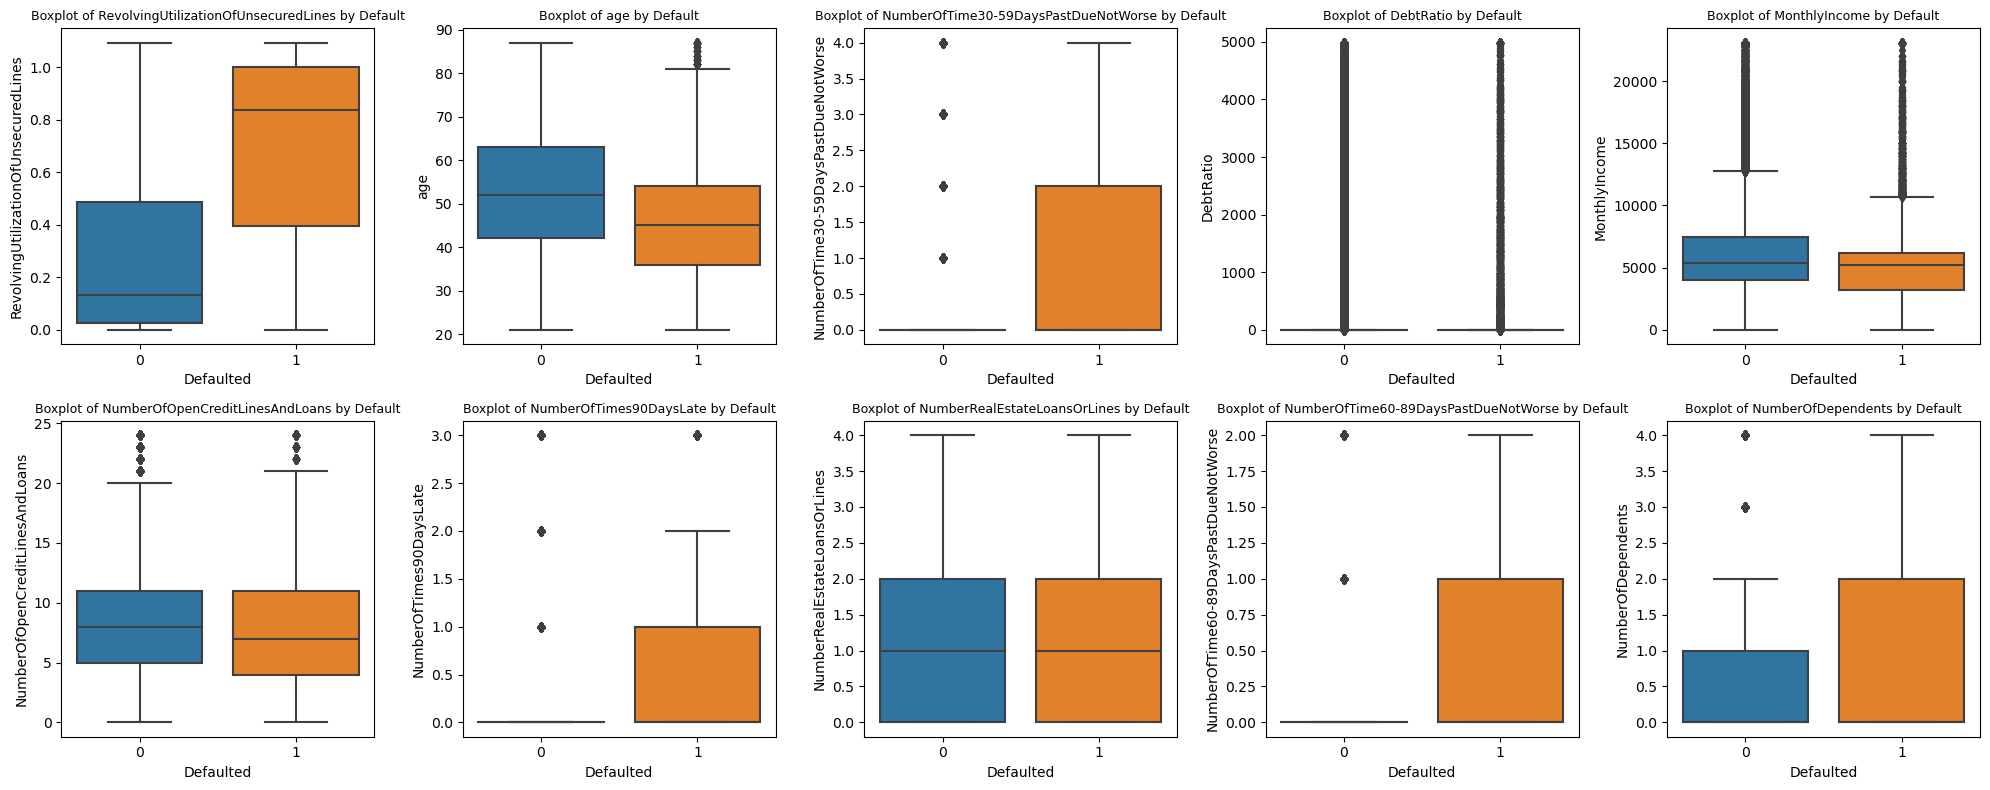

In [8]:
# Set up grid
rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize=(20, 8))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df_clean, x='SeriousDlqin2yrs', y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Default', fontsize=9)
    axes[i].set_xlabel('Defaulted')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


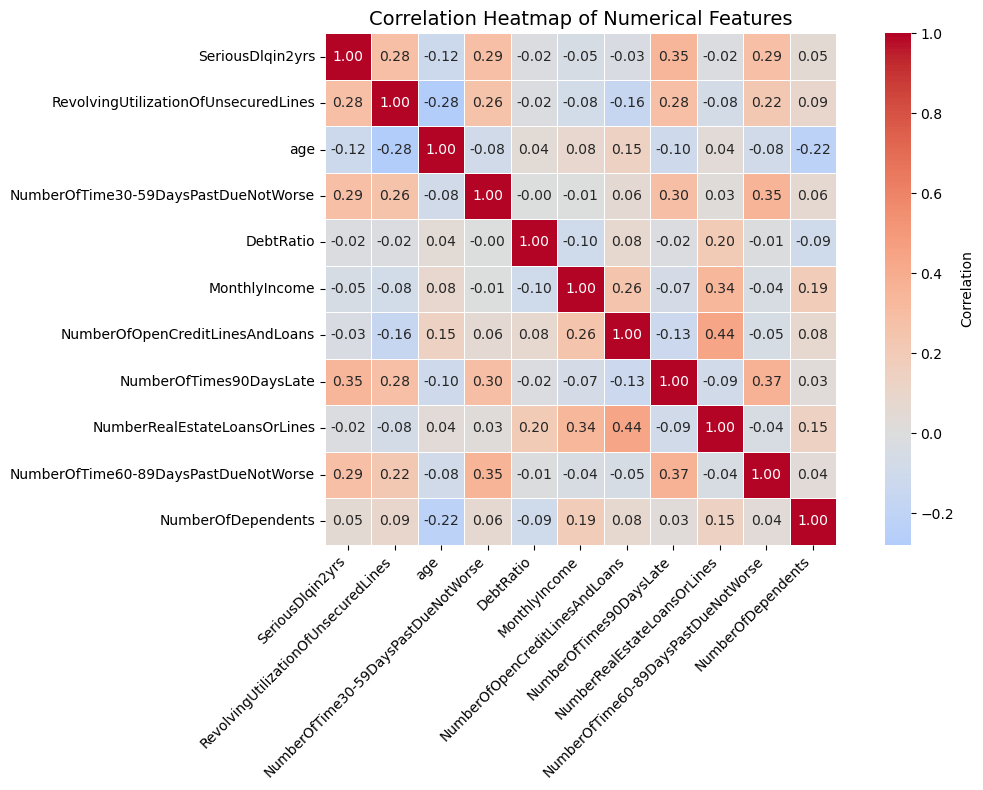

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: focus on numeric columns only
numeric_df = df_clean.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            cbar_kws={'label': 'Correlation'}, square=True, linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


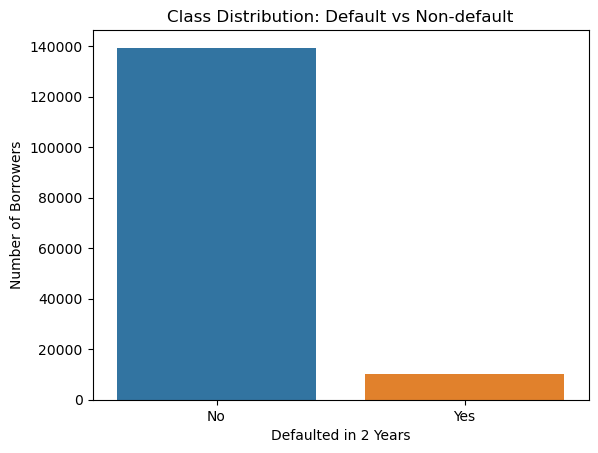

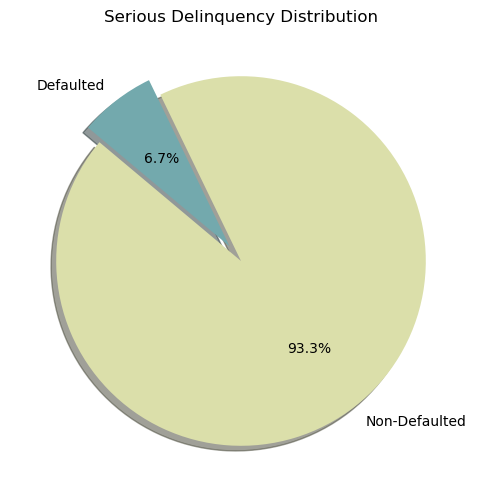

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot (clean and effective)
sns.countplot(x='SeriousDlqin2yrs', data=df_clean)
plt.title('Class Distribution: Default vs Non-default')
plt.xlabel('Defaulted in 2 Years')
plt.ylabel('Number of Borrowers')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Optional: Pie chart version
y = df_clean['SeriousDlqin2yrs']
default_rate = (y == 1).mean() * 100
labels = ['Non-Defaulted', 'Defaulted']
sizes = [100 - default_rate, default_rate]
explode = (0, 0.1)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True,
        startangle=140, colors=['#DBDFAA', "#73A9AD"])
plt.title('Serious Delinquency Distribution')
plt.show()


## 4. 📊 Preprocess Data and Train Model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = df_clean.drop(columns=['SeriousDlqin2yrs'])
y = df_clean['SeriousDlqin2yrs']

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Confirm balance
print("After SMOTE:\n", y_train_resampled.value_counts())


After SMOTE:
 SeriousDlqin2yrs
0    111519
1    111519
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Split features and target
X = df_clean.drop('SeriousDlqin2yrs', axis=1)
y = df_clean['SeriousDlqin2yrs']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.25).astype(int)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)



📊 Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     27862
           1       0.36      0.44      0.39      2016

    accuracy                           0.91     29878
   macro avg       0.66      0.69      0.67     29878
weighted avg       0.92      0.91      0.91     29878



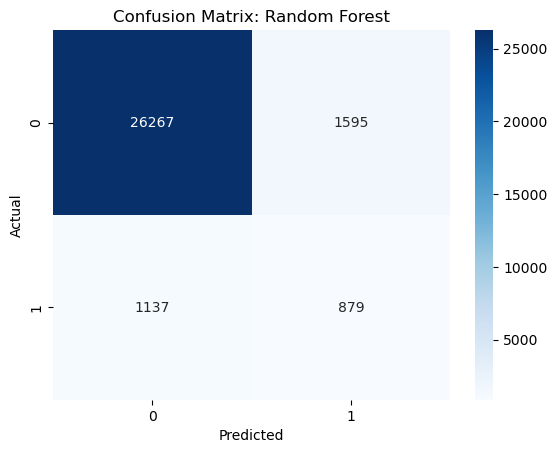


📊 Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.81      0.88     27862
           1       0.22      0.74      0.33      2016

    accuracy                           0.80     29878
   macro avg       0.60      0.77      0.61     29878
weighted avg       0.93      0.80      0.85     29878



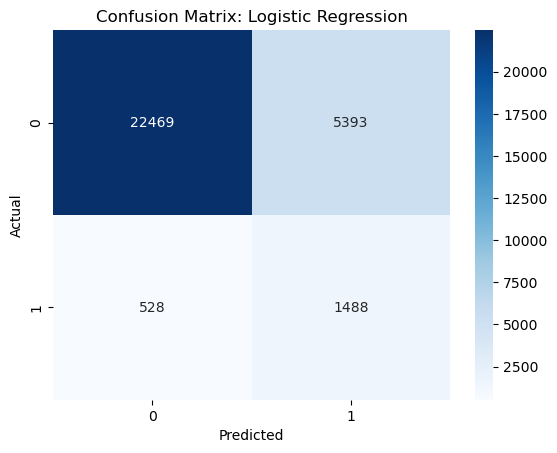

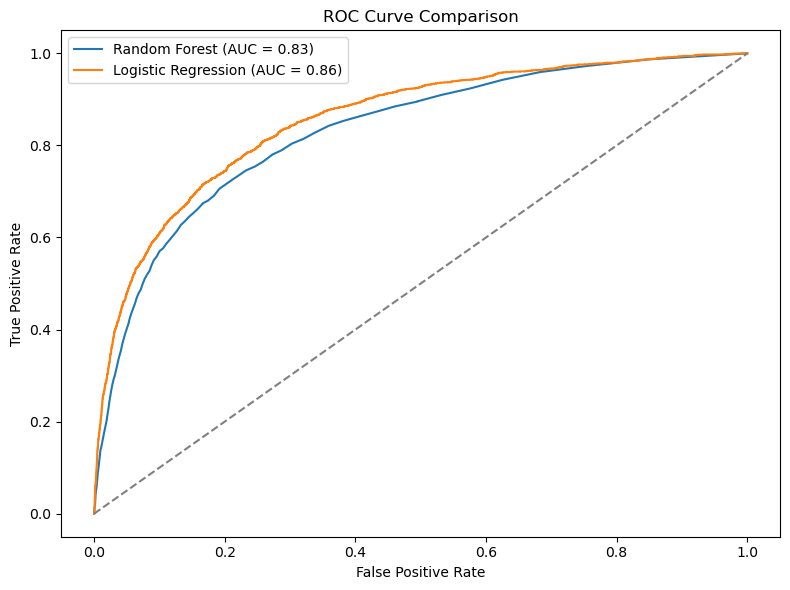

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Train Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)
lr_preds = lr_model.predict(X_test)
lr_probs = lr_model.predict_proba(X_test)[:, 1]

# Evaluation
for name, preds, probs in [('Random Forest', rf_preds, rf_probs), ('Logistic Regression', lr_preds, lr_probs)]:
    print(f"\n📊 Classification Report: {name}")
    print(classification_report(y_test, preds))
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()


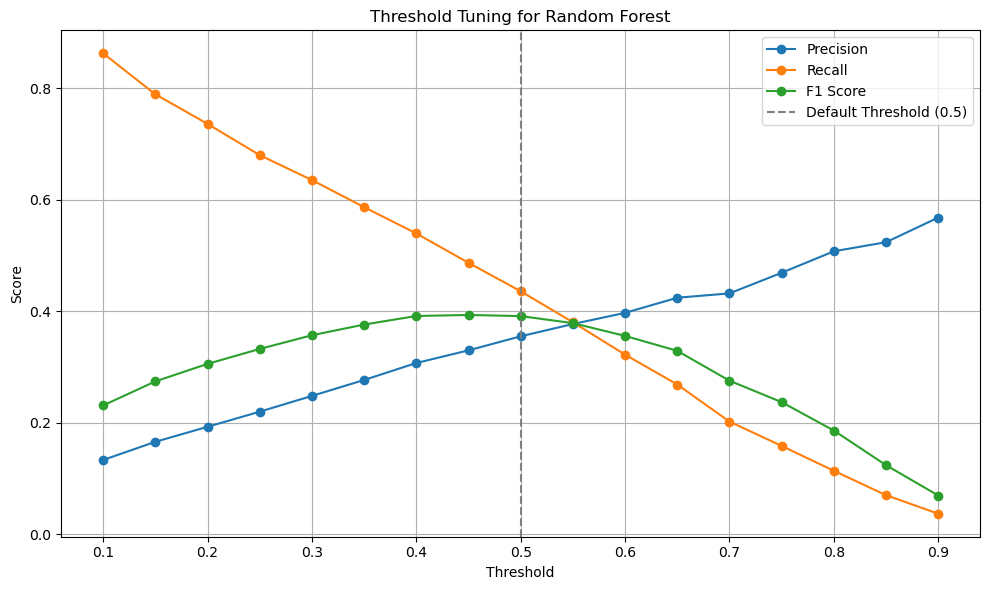

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Use predicted probabilities from your preferred model (e.g. Random Forest)
probs = rf_model.predict_proba(X_test)[:, 1]

# Try thresholds from 0.1 to 0.9
thresholds = np.arange(0.1, 0.91, 0.05)
precisions = []
recalls = []
f1s = []

for t in thresholds:
    preds = (probs >= t).astype(int)
    precisions.append(precision_score(y_test, preds))
    recalls.append(recall_score(y_test, preds))
    f1s.append(f1_score(y_test, preds))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1s, label='F1 Score', marker='o')
plt.axvline(x=0.5, color='gray', linestyle='--', label='Default Threshold (0.5)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning for Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Predictions saved to: output/random_forest_predictions.csv


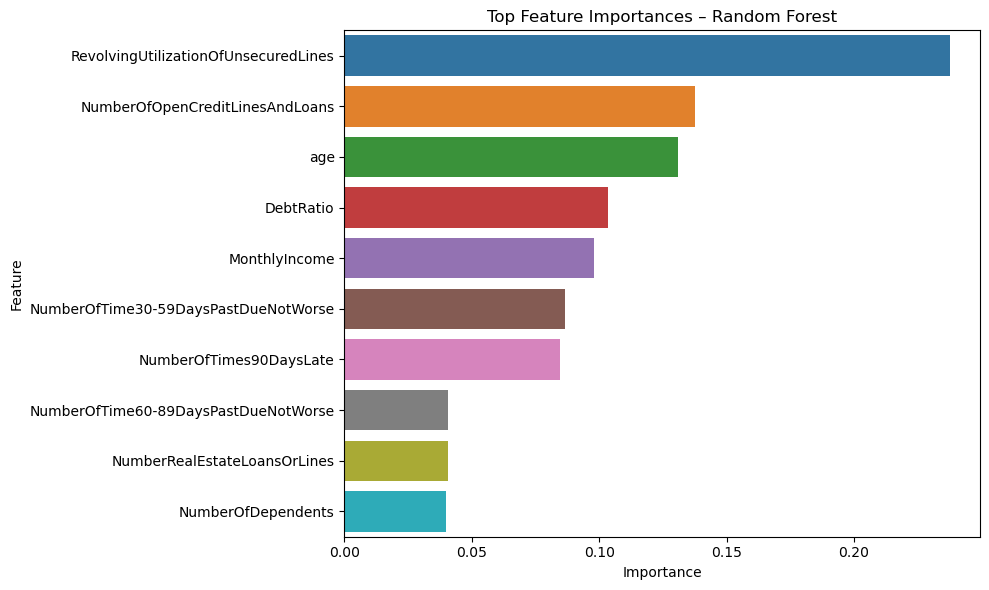

In [15]:
# Predict on the test set
rf_test_preds = rf_model.predict(X_test)
rf_test_probs = rf_model.predict_proba(X_test)[:, 1]

# Combine predictions with actuals
results_df = pd.DataFrame(X_test, columns=X.columns)
results_df['actual'] = y_test.values
results_df['predicted'] = rf_test_preds
results_df['predicted_proba'] = rf_test_probs

# Save predictions
results_df.to_csv("output/random_forest_predictions.csv", index=False)
print("✅ Predictions saved to: output/random_forest_predictions.csv")

# Plot feature importances
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Top Feature Importances – Random Forest")
plt.tight_layout()
plt.show()

## 5. 📈 Visualize Results

In [ ]:
# Confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## ✅ Save Predictions

In [ ]:
results = pd.DataFrame(X_test, columns=X.columns)
results['actual'] = y_test.values
results['predicted'] = y_pred
results['predicted_proba'] = y_proba
results.to_csv("output/model_predictions.csv", index=False)
print("Saved to output/model_predictions.csv")
